# MyQLM training tutorial (05/05/2024) - Basic OpenVQE     

## 0/ Observable

$H\  =\  Z_{0}+3X_{0}Y_{1}$

In [1]:
from qat.core import Term, Observable


term = Term(5.0 ,# coefficient
            "XYZ", # Pauli chain  
            [0,3,5]# Qubits on which each Pauli act
              )

obs = Observable(2, #number of qubit
            pauli_terms = [Term(1,"Z", [0]),
                        Term(3, "XZ", [0,1])])

print(obs)


1 * (Z|[0]) +
3 * (XZ|[0, 1])





## 1/ Simple circuits



### Reminding of the work flow

## VQE stack

&nbsp;
<div align="center"><img src="1.png" width="50%"></div>
&nbsp;

### 1.a: Creating a Bell pair

In [3]:
from qat.lang import Program, H, CNOT, X, S

# Create a Program
qprog = Program()
nbqbits = 2
qbits = qprog.qalloc(nbqbits)

H(qbits[0])
CNOT(qbits[0], qbits[1])

# Export this program into a quantum circuit
circuit = qprog.to_circ()
circuit.display()

# Import a Quantum Processor Unit Factory (the default one)
from qat.qpus import get_default_qpu
#import get_default_qpu to run on the QAPTIVA appliance
qpu = get_default_qpu()

# Create a job
job = circuit.to_job(nbshots=100)
result = qpu.submit(job)

for sample in result:
    print("State %s amplitude %s, %s (%s)" % (sample.state, sample.amplitude, sample.probability, sample.err))


State |00> amplitude None, 0.54 (0.050090826596203314)
State |11> amplitude None, 0.46 (0.050090826596203314)


/Users/theking/miniconda3/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


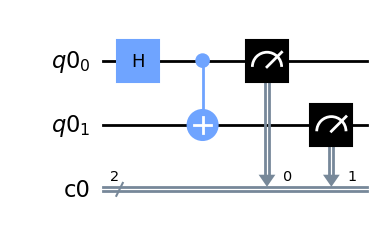

In [4]:
from qat.interop.qiskit import qlm_to_qiskit
# Interprobability with Qiskit

circ = circuit
ckt = qlm_to_qiskit(circ)
ckt.draw(output='mpl')

# Definition of all available gates

In the following table, we list and give the definition of all available gates on the QLM.

| Gate name | pyAQASM name | # qubits | Matrix |
| --------- | ------------ | -------- | ------ |
| Hadamard  | H            | 1        | $\begin{vmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \end{vmatrix}$ |
| Pauli X   | X            | 1        | $\begin{vmatrix} 0 & 1 \\ 1 & 0 \\ \end{vmatrix}$ |
| Pauli Y   | Y            | 1        | $\begin{vmatrix} 0 & -i \\ i & 0 \\ \end{vmatrix}$ |
| Pauli Z   | Z            | 1        | $\begin{vmatrix} 1 & 0 \\ 0 & -1 \\ \end{vmatrix}$ |
| Identity  | I            | 1        | $\begin{vmatrix} 1 & 0 \\ 0 & 1 \\ \end{vmatrix}$ |
| Phase Shift | PH($\theta$) | 1      | $\forall \theta \in \mathbb{R}$: $\begin{vmatrix} 1 & 0 \\ 0 & e^{i\theta} \\ \end{vmatrix}$ |
| Phase Shift gate of $\frac{\pi}{2}$ | S | 1 | $\begin{vmatrix} 1 & 0 \\ 0 & i \\ \end{vmatrix}$ |
| Phase Shift gate of $\frac{\pi}{4}$ | T | 1 | $\begin{vmatrix} 1 & 0 \\ 0 & e^{i\frac{\pi}{4}} \\ \end{vmatrix}$ |
| X Rotation | RX($\theta$) | 1 | $\forall \theta \in \mathbb{R}$: $\begin{vmatrix} \cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2}) \\ -i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \\ \end{vmatrix}$ |
| Y Rotation | RY($\theta$) | 1 | $\forall \theta \in \mathbb{R}$: $\begin{vmatrix} \cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\ \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \\ \end{vmatrix}$ |
| Z Rotation | RZ($\theta$) | 1 | $\forall \theta \in \mathbb{R}$: $\begin{vmatrix} e^{-i\frac{\theta}{2}} & 0 \\ 0 & e^{i\frac{\theta}{2}} \\ \end{vmatrix}$ |
| Controlled NOT | CNOT | 2 | $\begin{vmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ \end{vmatrix}$ |
| SWAP | SWAP | 2 | $\begin{vmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ \end{vmatrix}$ |
| iSWAP | ISWAP | 2 | $\begin{vmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & i & 0 \\ 0 & i & 0 & 0 \\ 0 & 0 & 0 & 1 \\ \end{vmatrix}$ |
| $\sqrt{\text{SWAP}}$ | SQRTSWAP | 2 | $\begin{vmatrix} 1 & 0 & 0 & 0 \\ 0 & \frac{1}{2}(1 + i) & \frac{1}{2}(1 - i) & 0 \\ 0 & \frac{1}{2}(1 - i) & \frac{1}{2}(1 + i) & 0 \\ 0 & 0 & 0 & 1 \\ \end{vmatrix}$ |
| Toffoli | CCNOT | 3 | $\begin{vmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ \end{vmatrix}$ |


In [1]:
#Short Example of what the gate look like 
from qat.lang.AQASM import Program, H, X, Y, Z, I, PH, S, T, RX, RY, RZ, CNOT, ISWAP, SQRTSWAP, CCNOT, SWAP

p = Program()
reg = p.qalloc(3)

p.apply(H, reg[0])
p.apply(X, reg[0])
p.apply(Y, reg[2])
p.apply(Z, reg[1])
p.apply(I, reg[1])
p.apply(S, reg[0])
p.apply(T, reg[0])
p.apply(PH(0.3), reg[0])
p.apply(RX(-0.3), reg[0])
p.apply(RY(0.6), reg[1])
p.apply(RZ(0.3), reg[0])
p.apply(CNOT, reg[0:2])
p.apply(SWAP, reg[0], reg[2])
p.apply(ISWAP, reg[1:3])
p.apply(SQRTSWAP, reg[0:2])
p.apply(CCNOT, reg)

circuit = p.to_circ()

circuit.display()

# 2/ Variational computations

Our task: VQE on the Ising model:

$$H = \sum_{i=1}^{N} a_i X_i + \sum_{i=1}^{N} \sum_{j=1}^{i-1} J_{ij} Z_i Z_j
$$

... with a "hardware-efficient" ansatz.

In [8]:
### Step 1 : Create the model

In [9]:
import numpy as np
from qat.core import Observable, Term

def ising(N):
    np.random.seed(123)  

    terms = []

    # Generate random coefficients for the transverse field term (X)
    a_coefficients = np.random.random(N)
    for i in range(N):
        term = Term(coefficient=a_coefficients[i], pauli_op="X", qbits=[i])
        terms.append(term)

    # Generate random coefficients for the interaction term (ZZ)
    J_coefficients = np.random.random((N, N))
    for i in range(N):
        for j in range(i):
            if i != j:  # avoid duplicate terms
                term = Term(coefficient=J_coefficients[i, j], pauli_op="ZZ", qbits=[i, j])
                terms.append(term)
    ising = Observable(N, pauli_terms=terms, constant_coeff=0.0)
    return ising

In [10]:
nqbits = 4
model = ising(nqbits)
print(model)

0.6964691855978616 * (X|[0]) +
0.28613933495037946 * (X|[1]) +
0.2268514535642031 * (X|[2]) +
0.5513147690828912 * (X|[3]) +
0.48093190148436094 * (ZZ|[1, 0]) +
0.4385722446796244 * (ZZ|[2, 0]) +
0.05967789660956835 * (ZZ|[2, 1]) +
0.18249173045349998 * (ZZ|[3, 0]) +
0.17545175614749253 * (ZZ|[3, 1]) +
0.5315513738418384 * (ZZ|[3, 2])


In [11]:
from qat.lang.AQASM import Program, QRoutine, RY, CNOT, RX, Z, H, RZ
from qat.core import Observable, Term, Circuit
from qat.lang.AQASM.gates import Gate
import matplotlib as mpl
import numpy as np
from typing import Optional, List
import warnings

def HEA_Linear(
    nqbits: int,
    #theta: List[float],
    n_cycles: int = 1,
    rotation_gates: List[Gate] = None,
    entangling_gate: Gate = CNOT,
) -> Circuit: #linear entanglement
    """
    This Hardware Efficient Ansatz has the reference from "Nonia Vaquero Sabater et al. Simulating molecules 
    with variational quantum eigensolvers. 2022" -Figure 6 -Link 
    "https://uvadoc.uva.es/bitstream/handle/10324/57885/TFM-G1748.pdf?sequence=1"

    Args:
        nqbits (int): Number of qubits of the circuit.
        n_cycles (int): Number of layers.
        rotation_gates (List[Gate]): Parametrized rotation gates to include around the entangling gate. Defaults to :math:`RY`. Must
            be of arity 1.
        entangling_gate (Gate): The 2-qubit entangler. Must be of arity 2. Defaults to :math:`CNOT`.
    """

    if rotation_gates is None:
        rotation_gates = [RZ]

    n_rotations = len(rotation_gates)

    prog = Program()
    reg = prog.qalloc(nqbits)
    theta = [prog.new_var(float, rf"\theta_{{{i}}}") for i in range(n_rotations * (nqbits + 2 * (nqbits - 1) * n_cycles))]
    
    
    ind_theta = 0


    
    for i in range(nqbits):

        for rot in rotation_gates:

            prog.apply(rot(theta[ind_theta]), reg[i])
            ind_theta += 1
    
    for k in range(n_cycles):


        for i in range(nqbits - 1):
            prog.apply(CNOT, reg[i], reg[i+1])
            
        for i in range(nqbits):
            for rot in rotation_gates:
                            
                prog.apply(rot(theta[ind_theta]), reg[i])
                ind_theta += 1

    return prog.to_circ()

In [12]:
n_layers = 4
circ_Linear = HEA_Linear(nqbits, n_layers, [RX,RZ], CNOT)
circ_Linear.display()

## VQE stack


&nbsp;
<div align="center"><img src="stack1.png" width="50%"></div>
&nbsp;

In [13]:
# we now build a stack that can handle variational jobs

from qat.plugins import ScipyMinimizePlugin
qpu = get_default_qpu()
optimizer_scipy = ScipyMinimizePlugin(method="BFGS", # Methods
                                      tol=1e-6,
                                      options={"maxiter": 200},
                                      x0=np.random.rand(n_layers*nqbits))
stack1 = optimizer_scipy | qpu

Minimum VQE energy =-2.1418870776404964


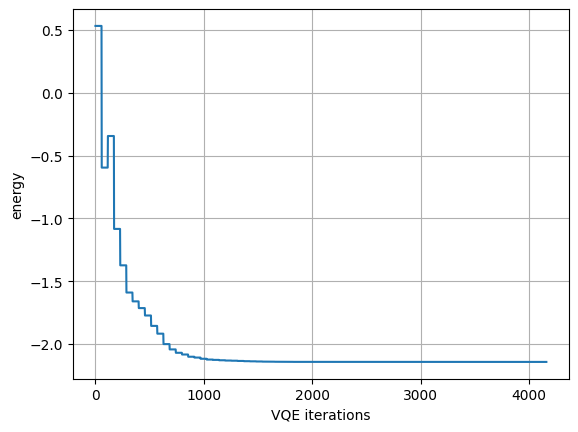

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# construct a (variational) job with the variational circuit and the observable
job = circ_Linear.to_job(observable=model)
# we submit the job and print the optimized variational energy (the exact GS energy is -3)
result1 = stack1.submit(job)
print(f"Minimum VQE energy ={result1.value}")
plt.plot(eval(result1.meta_data['optimization_trace']))
plt.xlabel("VQE iterations")
plt.ylabel("energy")
plt.grid()
plt.savefig("newfigure.pdf")

# 3 /Quantum chemistry: Solving H2 using UCC

``This part is adapted from myQLM documentatio demo``

The **Variational Quantum Eigensolver** method solves the following minimization problem :
$$
E = \min_{\vec{\theta}}\; \langle \psi(\vec{\theta}) \,|\, \hat{H} \,|\, \psi(\vec{\theta}) \rangle
$$

Here, we use a **Unitary Coupled Cluster** trial state, of the form:
$$
|\psi(\vec{\theta})\rangle = e^{\hat{T}(\vec{\theta}) - \hat{T}^\dagger(\vec{\theta})} |0\rangle
$$
where $\hat{T}(\theta)$ is the *cluster operator*: 
$$
\hat{T}(\vec{\theta}) = \hat{T}_1(\vec{\theta}) + \hat{T}_2(\vec{\theta}) + \cdots
$$
where
$$
\hat{T}_1 = \sum_{a\in U}\sum_{i \in O} \theta_a^i\, \hat{a}_a^\dagger \hat{a}_i \qquad
\hat{T}_2 = \sum_{a>b\in U}\sum_{i>j\in O} \theta_{a, b}^{i, j}\, \hat{a}^\dagger_a \hat{a}^\dagger_b \hat{a}_i \hat{a}_j \qquad
\cdots
$$
($O$ is the set of occupied orbitals and $U$, the set of unoccupied ones.)

In [15]:
from qat.fermion.chemistry.pyscf_tools import perform_pyscf_computation

geometry = [("H", (0.0, 0.0, 0.0)), ("H", (0.0, 0.0, 0.7414))]
basis = "sto-3g"
spin = 0
charge = 0

(
    rdm1,
    orbital_energies,
    nuclear_repulsion,
    n_electrons,
    one_body_integrals,
    two_body_integrals,
    info,
) = perform_pyscf_computation(geometry=geometry, basis=basis, spin=spin, charge=charge, run_fci=True)

print(
    f" HF energy :  {info['HF']}\n",
    f"MP2 energy : {info['MP2']}\n",
    f"FCI energy : {info['FCI']}\n",
)
print(f"Number of qubits before active space selection = {rdm1.shape[0] * 2}")

nqbits = rdm1.shape[0] * 2
print("Number of qubits = ", nqbits)

 HF energy :  -1.1166843870853405
 MP2 energy : -1.1298551535553094
 FCI energy : -1.137270174660903

Number of qubits before active space selection = 4
Number of qubits =  4


In [17]:
from qat.fermion.chemistry import MolecularHamiltonian, MoleculeInfo

# Define the molecular hamiltonian
mol_h = MolecularHamiltonian(one_body_integrals, two_body_integrals, nuclear_repulsion)

print(mol_h)

 MolecularHamiltonian(
 - constant_coeff : 0.7137539936876182
 - integrals shape
    * one_body_integrals : (2, 2)
    * two_body_integrals : (2, 2, 2, 2)
)


## Computation of cluster operators $T$ and good guess $\vec{\theta}_0$

We now construct the cluster operators (``cluster_ops``) defined in the introduction part as $\hat{T}(\vec{\theta})$, as well as a good starting parameter $\vec{\theta}$ (based on the second order Møller-Plesset perturbation theory).

In [21]:
from qat.fermion.chemistry.ucc import guess_init_params, get_hf_ket, get_cluster_ops

# Computation of the initial parameters
theta_init = guess_init_params(
    mol_h.two_body_integrals,
    n_electrons,
    orbital_energies,
)

print(f"List of initial parameters : {theta_init}")

# Define the initial Hartree-Fock state
ket_hf_init = get_hf_ket(n_electrons, nqbits=nqbits)

# Compute the cluster operators
cluster_ops = get_cluster_ops(n_electrons, nqbits=nqbits)

List of initial parameters : [0, 0, 0.07265074220469017]


In [22]:
from qat.fermion.transforms import transform_to_jw_basis  # , transform_to_bk_basis, transform_to_parity_basis
from qat.fermion.transforms import recode_integer, get_jw_code  # , get_bk_code, get_parity_code

# Compute the ElectronicStructureHamiltonian
H = mol_h.get_electronic_hamiltonian()

In [23]:
# Transform the ElectronicStructureHamiltonian into a spin Hamiltonian
H_sp = transform_to_jw_basis(H)

# Express the cluster operator in spin terms
cluster_ops_sp = [transform_to_jw_basis(t_o) for t_o in cluster_ops]

# Encoding the initial state to new encoding
hf_init_sp = recode_integer(ket_hf_init, get_jw_code(H_sp.nbqbits))

In [24]:
print(H_sp)

(-0.09886396933545824+0j) * I^4 +
(0.16862219158920938+0j) * (ZZ|[0, 1]) +
(0.12054482205301799+0j) * (ZZ|[0, 2]) +
(0.165867024105892+0j) * (ZZ|[1, 2]) +
(0.165867024105892+0j) * (ZZ|[0, 3]) +
(0.17119774903432972+0j) * (Z|[0]) +
(0.12054482205301799+0j) * (ZZ|[1, 3]) +
(0.17119774903432972+0j) * (Z|[1]) +
(0.04532220205287398+0j) * (XYYX|[0, 1, 2, 3]) +
(-0.04532220205287398+0j) * (XXYY|[0, 1, 2, 3]) +
(-0.04532220205287398+0j) * (YYXX|[0, 1, 2, 3]) +
(0.04532220205287398+0j) * (YXXY|[0, 1, 2, 3]) +
(0.17434844185575668+0j) * (ZZ|[2, 3]) +
(-0.22278593040418448+0j) * (Z|[2]) +
(-0.22278593040418448+0j) * (Z|[3])


In [25]:
from qat.lang.AQASM import Program, X
from qat.fermion.trotterisation import make_trotterisation_routine

prog = Program()
reg = prog.qalloc(H_sp.nbqbits)

# Initialize the Hartree-Fock state into the Program
for j, char in enumerate(format(hf_init_sp, "0" + str(H_sp.nbqbits) + "b")):
    if char == "1":
        prog.apply(X, reg[j])

# Define the parameters to optimize
theta_list = [prog.new_var(float, "\\theta_{%s}" % i) for i in range(len(cluster_ops))]

# Define the parameterized Hamiltonian
cluster_op = sum([theta * T for theta, T in zip(theta_list, cluster_ops_sp)])

# Trotterize the Hamiltonian (with 1 trotter step)
qrout = make_trotterisation_routine(cluster_op, n_trotter_steps=1, final_time=1)

prog.apply(qrout, reg)
circ = prog.to_circ()

In [26]:
from qat.fermion.chemistry.ucc import construct_ucc_ansatz

prog = construct_ucc_ansatz(cluster_ops_sp, hf_init_sp, n_steps=1)
circ = prog.to_circ()
circ.display()

In [27]:
job = circ.to_job(observable=H_sp, nbshots=0)

from qat.qpus import get_default_qpu
from qat.plugins import ScipyMinimizePlugin

optimizer_scipy = ScipyMinimizePlugin(method="COBYLA", tol=1e-3, options={"maxiter": 1000}, x0=theta_init)
qpu = optimizer_scipy | get_default_qpu()
result = qpu.submit(job)

print("Minimum energy =", result.value)

Minimum energy = -1.1372692847285149


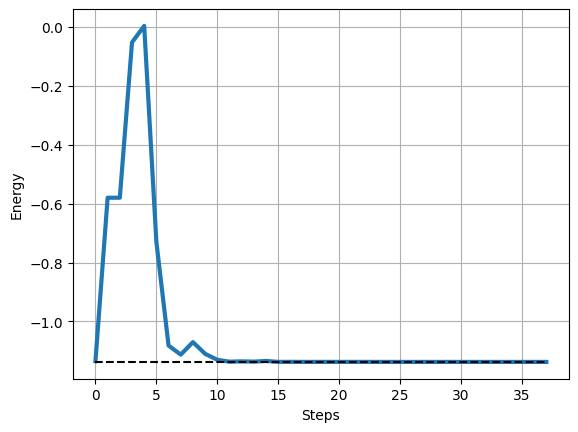

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(eval(result.meta_data["optimization_trace"]), lw=3)
plt.plot(
    [info["FCI"] for _ in enumerate(eval(result.meta_data["optimization_trace"]))],
    "--k",
    label="FCI",
)

plt.xlabel("Steps")
plt.ylabel("Energy")
plt.grid()

### Plotting the energy with respect to the interatomic distance

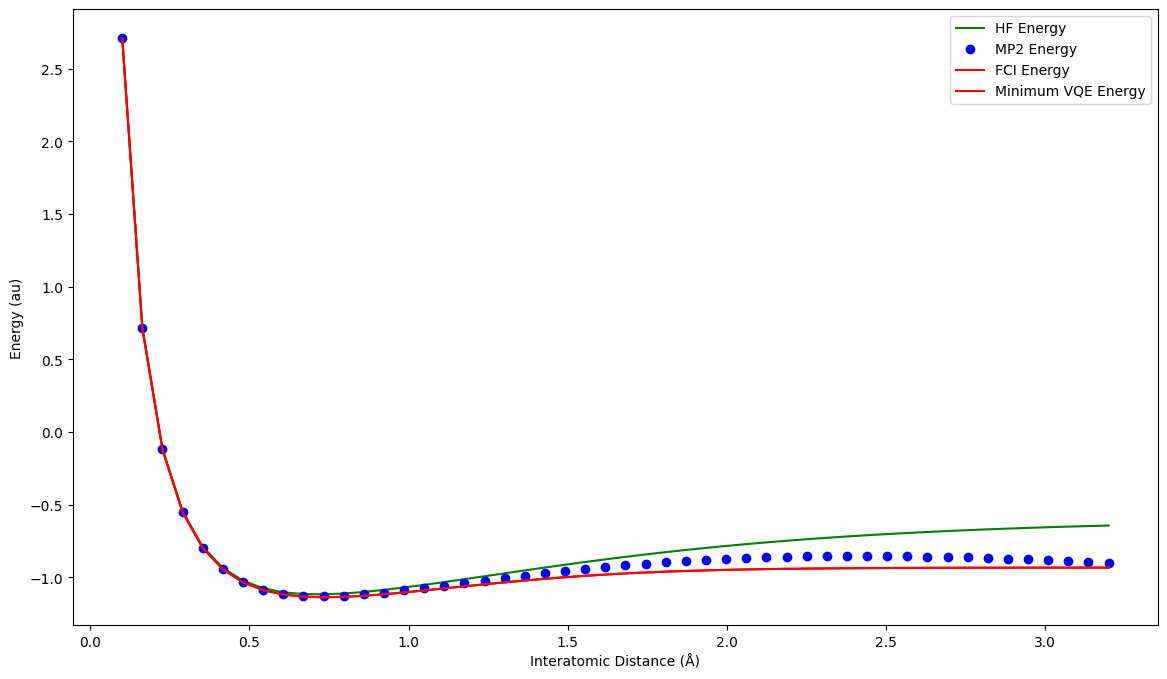

In [29]:
import numpy as np
import matplotlib.pyplot as plt

mp2Energies = []
fciEnergies = []
hfEnergies = []

minEnergies = []


start = 0.1
stop = 3.2
points = 50
r = np.linspace(start, stop, points)
basis = "sto-3g"
spin = 0
charge = 0

for distance in r:
    geometry = [("H", (0.0, 0.0, 0.0)), ("H", (0.0, 0.0, distance))]
    (
        rdm1,
        orbital_energies,
        nuclear_repulsion,
        n_electrons,
        one_body_integrals,
        two_body_integrals,
        info,
    ) = perform_pyscf_computation(
        geometry=geometry, basis=basis, spin=spin, charge=charge, run_fci=True
    )
    mol_h = MolecularHamiltonian(one_body_integrals, two_body_integrals, nuclear_repulsion)
    theta_init = guess_init_params(
        mol_h.two_body_integrals,
        n_electrons,
        orbital_energies,
    )
    ket_hf_init = get_hf_ket(n_electrons, nqbits=rdm1.shape[0] * 2)
    cluster_ops = get_cluster_ops(n_electrons, nqbits=rdm1.shape[0] * 2)

    H = mol_h.get_electronic_hamiltonian()
    H_sp = transform_to_jw_basis(H)
    cluster_ops_sp = [transform_to_jw_basis(t_o) for t_o in cluster_ops]
    hf_init_sp = recode_integer(ket_hf_init, get_jw_code(H_sp.nbqbits))

    prog = construct_ucc_ansatz(cluster_ops_sp, hf_init_sp, n_steps=1)
    circ = prog.to_circ()

    job = circ.to_job(observable=H_sp, nbshots=0)

    optimizer_scipy = ScipyMinimizePlugin(method="COBYLA", tol=1e-3, options={"maxiter": 1000}, x0=theta_init)
    qpu = optimizer_scipy | get_default_qpu()
    result = qpu.submit(job)

    minEnergies.append(result.value)
    hfEnergies.append(info['HF'])
    mp2Energies.append(info['MP2'])
    fciEnergies.append(info['FCI'])


fig = plt.figure(figsize=[14, 8])
plt.plot(r, hfEnergies, color='g', label='HF Energy')
plt.plot(r, mp2Energies, 'o', color='b', label='MP2 Energy')
plt.plot(r, fciEnergies, color='r', label='FCI Energy')
plt.plot(r, minEnergies, color='r', label='Minimum VQE Energy')
plt.ylabel("Energy (au)")
plt.xlabel("Interatomic Distance (Å)")
plt.legend()
plt.show()

# 4/ Running the Demo of OpenVQE Package

&nbsp;
<div align="center"><img src="2.png" width="50%"></div>
&nbsp;

In [30]:

from openvqe.common_files.qubit_pool import QubitPool
from openvqe.common_files.molecule_factory import MoleculeFactory
from openvqe.ucc_family.get_energy_ucc import EnergyUCC
from qat.fermion.transforms import (get_jw_code, recode_integer)

qubit_pool = QubitPool()
molecule_factory = MoleculeFactory()
energy_ucc = EnergyUCC()


# user can type the name of molecule (H2, LIH, CO, CO2 such that their geormetries and properties are defined in MoleculeQlm())
molecule_symbol = 'H2'
# the type of generators: UCCSD, singlet_sd, singlet_gsd, spin_complement_gsd, spin_complement_gsd_twin, sUPCCGSD
# suppose user type sUPCCGSD
type_of_generator = 'sUPCCGSD'
# user can type any of the following three transformations: JW,  Bravyi-Kitaev and Parity-basis
transform = 'JW'
# the non_active space selection
active = False


r, geometry, charge, spin, basis = molecule_factory.get_parameters(molecule_symbol)
print(" --------------------------------------------------------------------------")
print("Running in the non active case: ")
print("                     molecule symbol: %s " %(molecule_symbol))
print("                     molecule basis: %s " %(basis))
print("                     type of generator: %s " %(type_of_generator))
print("                     transform: %s " %(transform))
print(" --------------------------------------------------------------------------")

print(" --------------------------------------------------------------------------")
print("                                                          ")
print("                      Generate Hamiltonians and Properties:")
print("                                                          ")
print(" --------------------------------------------------------------------------")
print("                                                          ")

hamiltonian, hamiltonian_sp, n_elec, noons_full, orb_energies_full, info = molecule_factory.generate_hamiltonian(molecule_symbol, active=active, transform=transform)

print(" --------------------------------------------------------------------------")
print("                                                          ")
print("                      Generate Cluster OPS:")
print("                                                          ")
print(" --------------------------------------------------------------------------")
print("                                                           ")


# properties 
nbqbits = hamiltonian_sp.nbqbits

# for uccsd_case 
# pool_size,cluster_ops,cluster_ops_sp, theta_MP2, hf_init = molecule_factory.generate_cluster_ops(molecule_symbol,
#                                         type_of_generator=type_of_generator, transform=transform, active=active)
# hf_init_sp = recode_integer(hf_init, get_jw_code(hamiltonian_sp.nbqbits))

# for other type of excitations like UCCGSD, k-UpCCGSD, spin-complement pairs etc  
pool_size,cluster_ops,cluster_ops_sp = molecule_factory.generate_cluster_ops(molecule_symbol, 
                    type_of_generator=type_of_generator, transform=transform, active=active)
hf_init = molecule_factory .find_hf_init(hamiltonian, n_elec, noons_full, orb_energies_full)
reference_ket, hf_init_sp = molecule_factory.get_reference_ket(hf_init, nbqbits, transform)

print('Pool size: ', pool_size)
print('length of the cluster OP: ', len(cluster_ops))
print('length of the cluster OPS: ', len(cluster_ops_sp))
fci = info['FCI']



# suppose user wants to generate cluster operators using the Qubit Pool generators: then we can have two functions, 
# 1. generate_pool_without_cluster 2.generate_pool_from_cluster

#1. using generate_pool_without_cluster:
# pool_type = 'full_without_Z'
# qubit_pool = QubitPool.generate_pool(cluster_ops)
# len_returned_pool, returned_pool = qubit_pool.generate_pool_without_cluster(pool_type=pool_type, 
#                                                                         nbqbits=nbqbits, 
#                                                                         qubit_pool=qubit_pool,
#                                                                         molecule_symbol=
#                                                                         molecule_symbol)

# 2. generate_pool_from_cluster
pool_condition='reduced_without_Z'
len_returned_pool, returned_pool = qubit_pool.generate_pool_from_cluster(pool_condition, cluster_ops, nbqbits)
    


# HERE USER can apply UCC-family VQE using MP2 guess defined by theta_current1; and using either a constant value starting guess 
#(0.0,0.001,1.0, etc) or random numbers defined by theta_current2


pool_generator = returned_pool
theta_current2 = []
for i in range(len(returned_pool)):
    theta_current2.append(0.01)
# when UCCSD is not used then one can make theta_current1 same as theta_current2     
theta_current1  = theta_current2
# define two lists: 1. ansatz_ops to append operators direct coming from fermionic evolutions (after spin-transformation) 
# and 2. ansatz_q_ops to append operators coming from "Qubit Pool generators"
ansatz_ops = []
ansatz_q_ops = []

# important note: when UCCSD  is called at the top, then we must skip 1j in ansatz_ops (why? due to the internal functions defined by "mqlm-fermion" package)


for i in cluster_ops_sp:
    ansatz_ops.append(i*1j)
for i in pool_generator:
    ansatz_q_ops.append(i)
    
# now we can run EnergyUCC.get_energies to get to get the energies and properties (CNOT counts, )
# 1.  from  UCC-family (with ansatz_ops and theta-current1) 
# 2. from  UCC-family but with qubit evolutions i.e from "Qubit Pool" (with ansatz_q_ops and theta-current2)

iterations, result = energy_ucc.get_energies(hamiltonian_sp,ansatz_ops,ansatz_q_ops,hf_init_sp,theta_current1,theta_current2,fci)
print("iterations are:", iterations)
print("results are:", result)


print(iterations, result)







 --------------------------------------------------------------------------
Running in the non active case: 
                     molecule symbol: H2 
                     molecule basis: 6-31g 
                     type of generator: sUPCCGSD 
                     transform: JW 
 --------------------------------------------------------------------------
 --------------------------------------------------------------------------
                                                          
                      Generate Hamiltonians and Properties:
                                                          
 --------------------------------------------------------------------------
                                                          
Number of electrons =  2
Number of qubits before active space selection =  8
Orbital energies =  [-0.59279976  0.23579258  0.77956294  1.39138474]
Nuclear repulsion =  0.70556961456
Noons =  [1.9705947706867002, 0.02412748118576972, 0.005019126551194678,

/Users/theking/miniconda3/lib/python3.11/site-packages/openvqe/common_files/molecule_factory.py:469: UserWarning: This guess_init_state function is deprecated.
  _, _, hf_init = get_cluster_ops_and_init_guess(


The current pool is reduced_without_Z
tolerance=  0.0001
method=  BFGS
Optimization terminated successfully.
         Current function value: -1.151689
         Iterations: 32
         Function evaluations: 760
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: -1.143323
         Iterations: 11
         Function evaluations: 418
         Gradient evaluations: 22
iterations are: {'minimum_energy_result1_guess': [-1.1516885450177217], 'minimum_energy_result2_guess': [-1.1433228515748053], 'theta_optimized_result1': [[-0.0014639279677195183, -0.004793145929314751, 0.00928873721256087, 0.004298400092994804, 0.008369027638806379, 0.011523111339060307, -0.10857366451779296, -0.05255823506435128, -0.01532269087958765, -0.020286898272625135, -0.03143987914786955, -0.007696207787373331, 0.0013358806782863867, -0.0011705022795616919, -0.0004015768534717821, -0.004348657038498894, -0.6003786504116183, -0.00015535446728741364]], 'theta_optimize

# 5 / Triple Excitation from OpenVQE

In [31]:
from openvqe.common_files.generator_excitations import (
    triple_excitation,
    _apply_transforms,
)
from openvqe.common_files.orbital_symmetry import HF_sym


def generate(
    molecule,
    n_occ,
    n_spatial_orb,
    apply_HF_sym,
    apply_transform,
):
    ops = triple_excitation(n_spatial_orb, n_occ)

    if apply_HF_sym:
        ops = HF_sym(molecule, n_occ, ops)

    if apply_transform:
        ops = _apply_transforms(ops, "JW")[-1]
    return ops


ops = generate(
    molecule="LiH", n_occ=4, n_spatial_orb=6, apply_HF_sym=True, apply_transform=True
)

print(len(ops))

converged SCF energy = -7.86202695939413
E(CCSD) = -7.882392916908373  E_corr = -0.02036595751423768
converged SCF energy = -7.86202695939413
24


# 6/  Aiming to compute the exciited state 

/home/huybinh/.local/lib/python3.10/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1272: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


[-0.34365999 -0.73471515 -1.10531794  0.06379356  0.53997675 -0.04309338
 -0.04309338 -0.58081898 -0.73471515 -0.03679734 -0.58081898 -0.73471515
 -0.03679734 -0.60084192 -0.60084192  0.52624985]
         Current function value: -3.058262
         Iterations: 52
         Function evaluations: 3065
         Gradient evaluations: 71
Final energy for k=0000: -1.071647282296317
Final energy for k=0001: -0.7347151546428174
Final energy for k=1011: -0.6008419231253104
Final fidelity for k=0000: 0.9711997921075454
Final fidelity for k=0001: 0.9999999999998055
Final fidelity for k=1011: 0.9999999999952764


/home/huybinh/.local/lib/python3.10/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


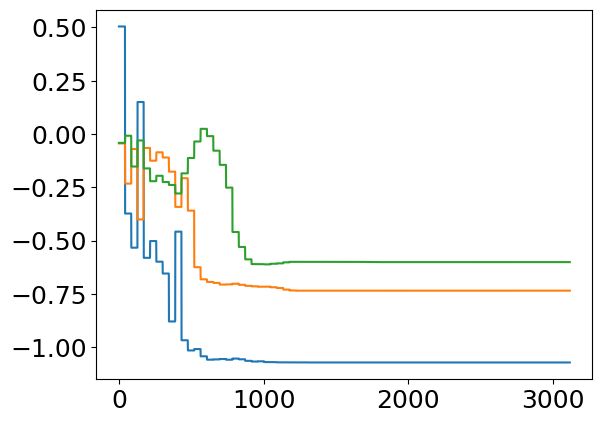

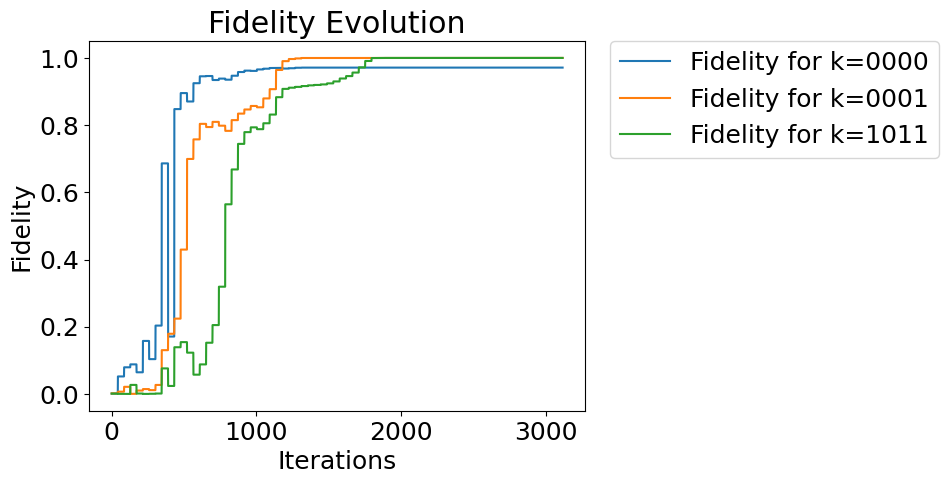

In [16]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import binary_repr
from qat.qpus import get_default_qpu

qpu = get_default_qpu()
method = "BFGS"
model = hamiltonian_sp
vals = 15

eigenvec_input_tar = calculate_eigen_vectors(model, vals)
eigenvec_input = [eigenvec_input_tar[2],eigenvec_input_tar[8], eigenvec_input_tar[13]] 


energy_lists = {f"energy_circ_{i}": {method: []} for i in range(len(circuits_store))}
fidelity_lists = {f"fidelity_circ_{i}": {method: []} for i in range(len(circuits_store))}

def opt_funct(circuits, model, qpu, nqbits, energy_lists, fidelity_lists, weight, eigenvec_input):
    def input_funct(x):
        total_energy = 0
        for i, circ in enumerate(circuits):
            bound_circ = circ.bind_variables({k: v for k, v in zip(sorted(circ.get_variables()), x)})
            result = qpu.submit(bound_circ.to_job(observable=model))
            energy = result.value
            energy_lists[f"energy_circ_{i}"][method].append(energy)

            # Calculate fidelity
            fidelity = fun_fidelity(bound_circ, eigenvec_input[i], nqbits)
            fidelity_lists[f"fidelity_circ_{i}"][method].append(fidelity)
            #print(fidelity)

            total_energy += weight[i] * energy
        return total_energy

    def callback(x):
        for i, circ in enumerate(circuits):
            bound_circ = circ.bind_variables({k: v for k, v in zip(sorted(circ.get_variables()), x)})
            result = qpu.submit(bound_circ.to_job(observable=model))
            energy = result.value
            energy_lists[f"energy_circ_{i}"][method].append(energy)

            # Calculate fidelity
            fidelity = fun_fidelity(bound_circ, eigenvec_input[i], nqbits)
            fidelity_lists[f"fidelity_circ_{i}"][method].append(fidelity)

    return input_funct, callback


input_funct, callback = opt_funct(circuits_store, model, qpu, nqbits, energy_lists, fidelity_lists, weight, eigenvec_input)
options = {"disp": True, "maxiter": 3500, "gtol": 1e-7}
Optimizer = scipy.optimize.minimize(input_funct, x0=init_theta_list, method=method, callback=callback, options=options)

# Plot energy
plt.rcParams["font.size"] = 18
all_energy_lists = []

for i in range(len(circuits_store)):
    energy_list = energy_lists[f"energy_circ_{i}"][method]
    all_energy_lists.append(energy_list)
    plt.plot(range(len(energy_list)), energy_list, label=f"Energy for k={binary_repr(k_lst[i]).zfill(4)}")

    # Print the final energy for each k
    final_energy = energy_list[-1]
    print(f"Final energy for k={binary_repr(k_lst[i]).zfill(4)}: {final_energy}")

# Plot fidelity
plt.figure()
all_fidelity_lists = []

for i in range(len(circuits_store)):
    fidelity_list = fidelity_lists[f"fidelity_circ_{i}"][method]
    all_fidelity_lists.append(fidelity_list)
    plt.plot(range(len(fidelity_list)), fidelity_list, label=f"Fidelity for k={binary_repr(k_lst[i]).zfill(4)}")

    # Print the final fidelity for each k
    final_fidelity = fidelity_list[-1]
    print(f"Final fidelity for k={binary_repr(k_lst[i]).zfill(4)}: {final_fidelity}")

plt.xlabel("Iterations")
plt.ylabel("Fidelity")
plt.title("Fidelity Evolution")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.show()
